In [1]:
from xml.sax import make_parser
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import missingno as msno 
import streamlit as st 

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.shape

(21613, 21)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<AxesSubplot:>

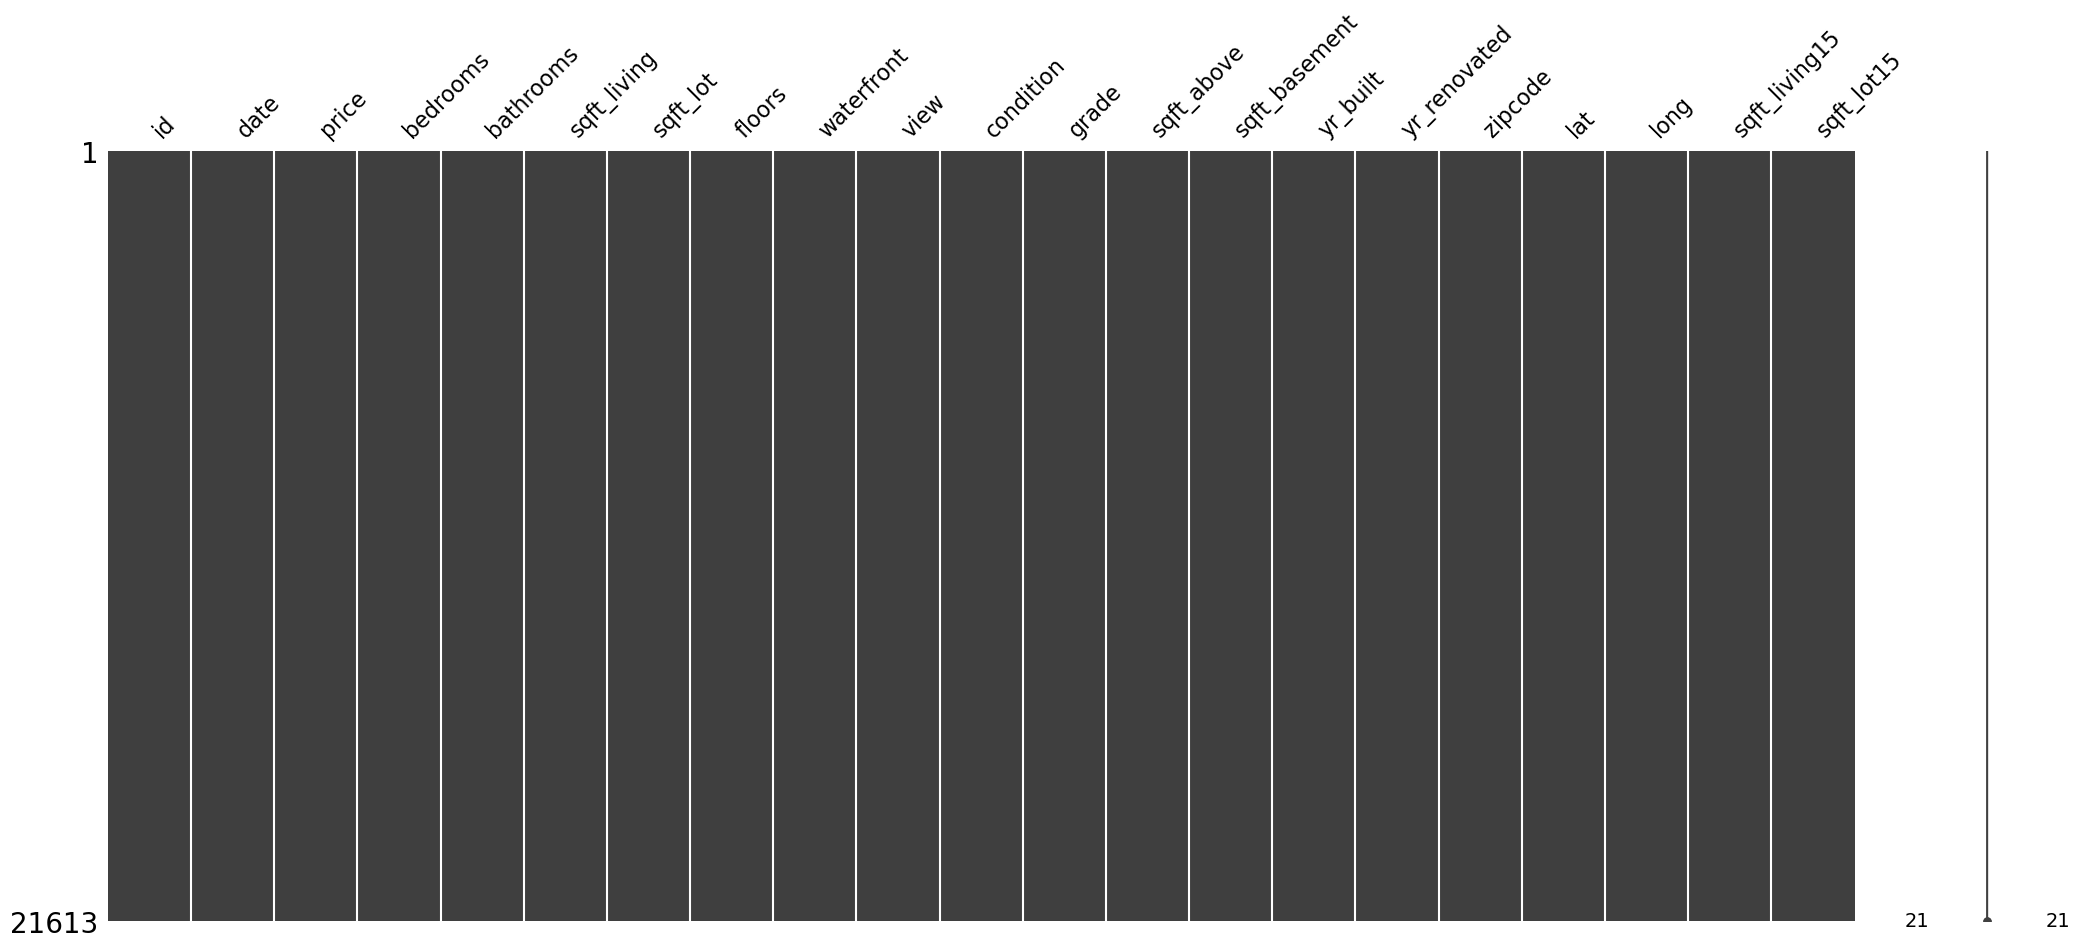

In [6]:
msno.matrix(df)

In [7]:
df.iloc[:,:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
df['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [9]:
df.groupby(['bedrooms','id']).mean()

price  bathrooms  sqft_living  sqft_lot  floors  \
bedrooms id                                                                
0        1222029077   265000.0       0.75        384.0  213444.0     1.0   
         1453602309   288000.0       1.50       1430.0    1650.0     3.0   
         2310060040   240000.0       2.50       1810.0    5669.0     2.0   
         2569500210   339950.0       2.50       2290.0    8319.0     2.0   
         2954400190  1295650.0       0.00       4810.0   28008.0     2.0   
...                        ...        ...          ...       ...     ...   
10       627300145   1148000.0       5.25       4590.0   10920.0     1.0   
         5566100170   650000.0       2.00       3610.0   11914.0     2.0   
         8812401450   660000.0       3.00       2920.0    3745.0     2.0   
11       1773100755   520000.0       3.00       3000.0    4960.0     2.0   
33       2402100895   640000.0       1.75       1620.0    6000.0     1.0   

                     waterfront  view  condition  grade  sqft_above  \
bedrooms id                                                           
0        1222029077         0.0   0.0        3.0    4.0       384.0   
         1453602309         0.0   0.0        3.0    7.0      1430.0   
         2310060040         0.0   0.0        3.0    7.0      1810.0   
         2569500210         0.0   0.0        3.0    8.0      2290.0   
         2954400190         0.0   0.0        3.0   12.0      4810.0   
...                         ...   ...        ...    ...         ...   
10       627300145          0.0   2.0        3.0    9.0      2500.0   
         5566100170         0.0   0.0        4.0    7.0      3010.0   
         8812401450         0.0   0.0        4.0    7.0      1860.0   
11       1773100755         0.0   0.0        3.0    7.0      2400.0   
33       2402100895         0.0   0.0        5.0    7.0      1040.0   

                     sqft_basement  yr_built  yr_renovated  zipcode      lat  \
bedrooms id                                                                    
0        1222029077            0.0    2003.0           0.0  98070.0  47.4177   
         1453602309            0.0    1999.0           0.0  98125.0  47.7222   
         2310060040            0.0    2003.0           0.0  98038.0  47.3493   
         2569500210            0.0    1985.0           0.0  98042.0  47.3473   
         2954400190            0.0    1990.0           0.0  98053.0  47.6642   
...                            ...       ...           ...      ...      ...   
10       627300145          2090.0    2008.0           0.0  98004.0  47.5861   
         5566100170          600.0    1958.0           0.0  98006.0  47.5705   
         8812401450         1060.0    1913.0           0.0  98105.0  47.6635   
11       1773100755          600.0    1918.0        1999.0  98106.0  47.5560   
33       2402100895          580.0    1947.0           0.0  98103.0  47.6878   

                        long  sqft_living15  sqft_lot15  
bedrooms id                                              
0        1222029077 -122.491         1920.0    224341.0  
         1453602309 -122.290         1430.0      1650.0  
         2310060040 -122.053         1810.0      5685.0  
         2569500210 -122.151         2500.0      8751.0  
         2954400190 -122.069         4740.0     35061.0  
...                      ...            ...         ...  
10       627300145  -122.113         2730.0     10400.0  
         5566100170 -122.175         2040.0     11914.0  
         8812401450 -122.320         1810.0      3745.0  
11       1773100755 -122.363         1420.0      4960.0  
33       2402100895 -122.331         1330.0      4700.0  

[21436 rows x 18 columns]

In [10]:
#sns.set_theme(style="ticks")
#sns.pairplot(df, hue="price")

2402100895

2402100895

In [11]:
df.loc[df['bedrooms'] > 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [12]:
df = df.assign(surface = df.sqft_living * 0.092903)

In [13]:
df['surface']

0        109.62554
1        238.76071
2         71.53531
3        182.08988
4        156.07704
           ...    
21608    142.14159
21609    214.60593
21610     94.76106
21611    148.64480
21612     94.76106
Name: surface, Length: 21613, dtype: float64

In [14]:
df.groupby(['surface','price']).all()

,,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
surface,price,,,,,,,,,,,,,,,,,,,,
26.941870,142000.0,True,True,False,False,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True
34.374110,276000.0,True,True,True,True,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True
35.303140,245000.0,True,True,True,True,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True
35.674752,265000.0,True,True,False,True,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True
36.232170,228000.0,True,True,False,True,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895.584920,4668000.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
918.810670,6885000.0,True,True,True,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True
932.746120,7062500.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [15]:
df.loc[df['surface'] > 700]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,surface
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788,744.15303
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,743.22400
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,932.74612
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,854.70760
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,1119.48115
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454,895.58492
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,918.81067
12777,1225069038,20140505T000000,2280000.0,7,8.00,13540,307752,3.0,0,4,...,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,1257.90662
13411,2426039123,20150130T000000,2415000.0,5,4.75,7880,24250,2.0,0,2,...,7880,0,1996,0,98177,47.7334,-122.362,2740,10761,732.07564
14032,3459900230,20141125T000000,1680000.0,4,3.75,7620,29536,2.0,0,3,...,5980,1640,2005,0,98006,47.5571,-122.140,2840,20809,707.92086


In [16]:
df.drop(df[df['bedrooms'] < 1].index, inplace= True)

In [17]:
df.shape

(21600, 22)

<AxesSubplot:>

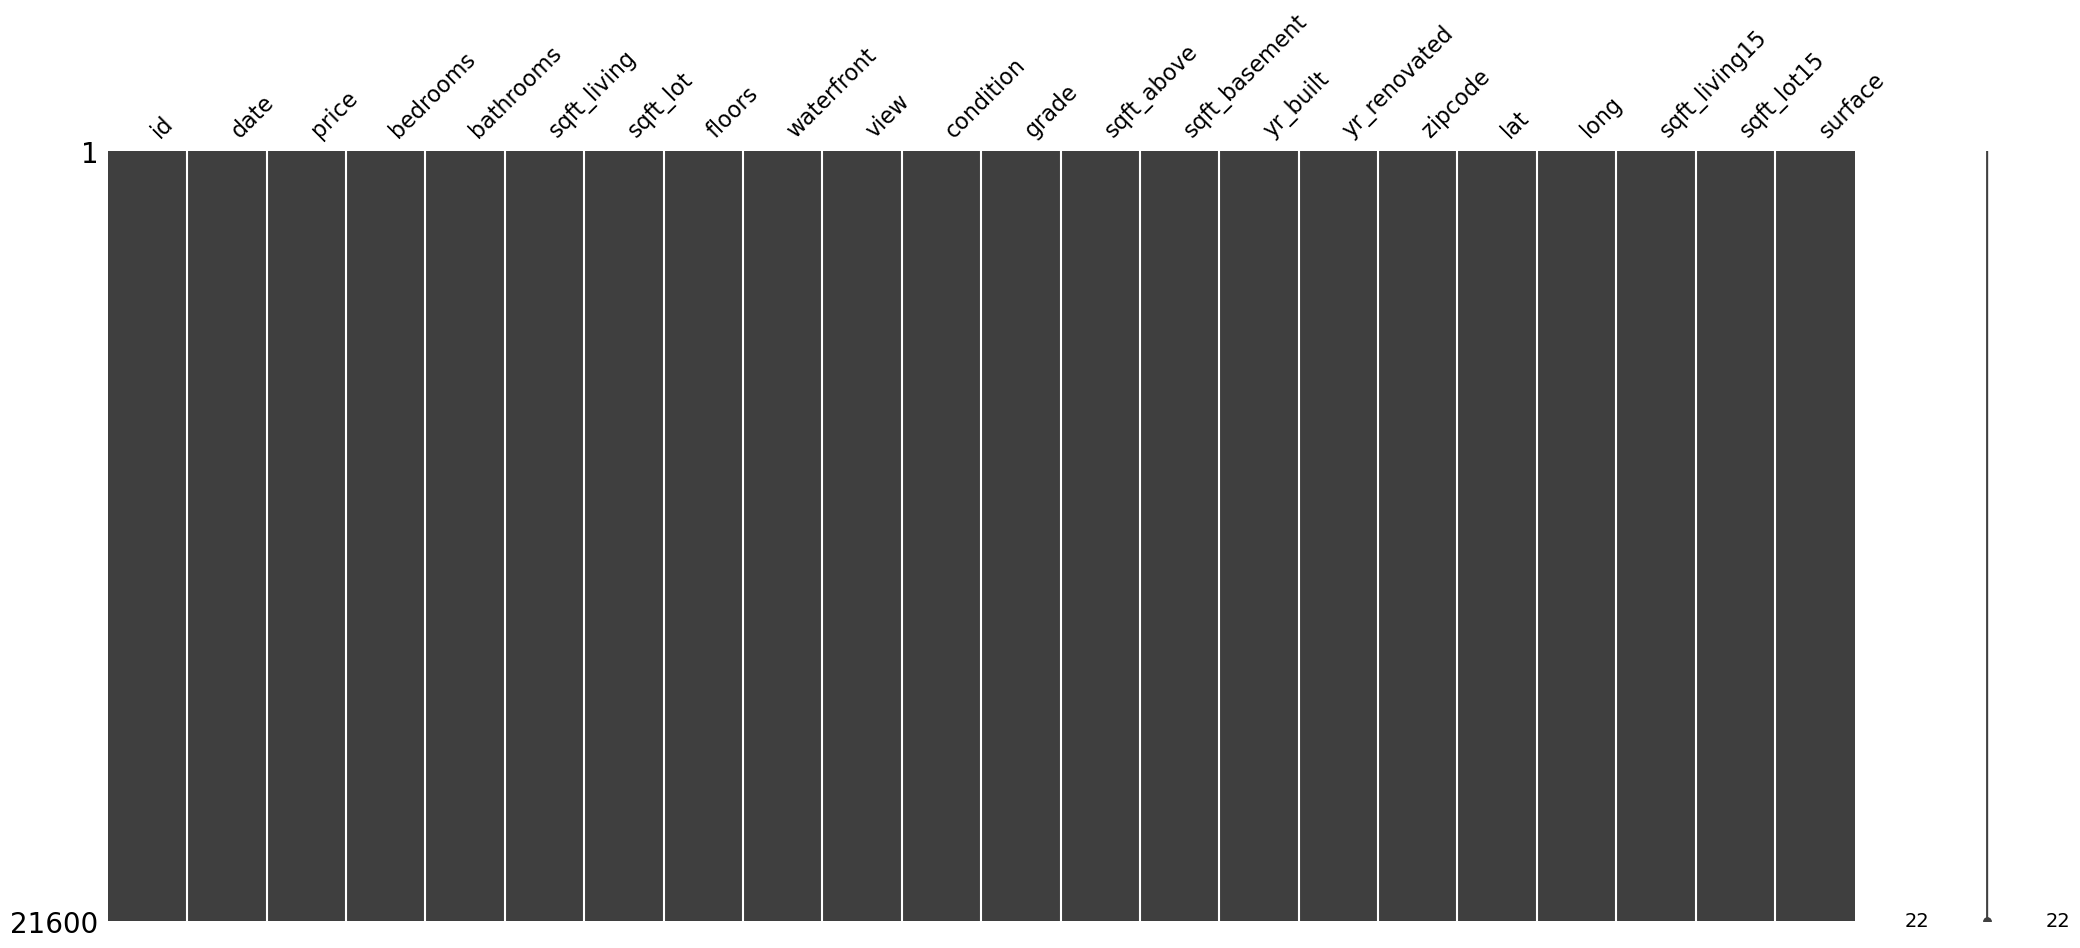

In [18]:
msno.matrix(df)

In [19]:
df.loc[df['yr_renovated'] <1980]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,surface
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,109.62554
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,71.53531
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,182.08988
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,156.07704
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,503.53426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,142.14159
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,214.60593
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,94.76106
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,148.64480


In [20]:
df.shape

(21600, 22)

In [21]:
df.groupby(['zipcode']).min()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,surface
zipcode,,,,,,,,,,,,,,,,,,,,,
98001,128500260,20140502T000000,100000.0,1,0.75,770,2064,1.0,0,0,...,5,770,0,1903,0,47.2576,-122.294,828,2855,71.53531
98002,1000102,20140514T000000,95000.0,1,0.75,690,2800,1.0,0,0,...,5,690,0,1908,0,47.2761,-122.229,860,2800,64.10307
98003,100500020,20140502T000000,128000.0,1,1.00,760,1302,1.0,0,0,...,6,760,0,1927,0,47.2574,-122.334,970,1302,70.60628
98004,249000115,20140505T000000,425000.0,2,1.00,860,779,1.0,0,0,...,6,820,0,1908,0,47.5806,-122.229,1290,794,79.89658
98005,324059112,20140505T000000,400000.0,2,1.00,980,2551,1.0,0,0,...,6,920,0,1943,0,47.5830,-122.185,1440,2601,91.04494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98177,106000044,20140505T000000,245560.0,1,1.00,540,1279,1.0,0,0,...,5,540,0,1906,0,47.7013,-122.393,1050,1427,50.16762
98178,3800008,20140507T000000,90000.0,1,0.75,580,3000,1.0,0,0,...,5,480,0,1905,0,47.4816,-122.279,880,3000,53.88374
98188,41000454,20140513T000000,110000.0,2,0.75,670,3435,1.0,0,0,...,5,670,0,1920,0,47.4232,-122.298,900,2308,62.24501


<AxesSubplot:xlabel='surface', ylabel='price'>

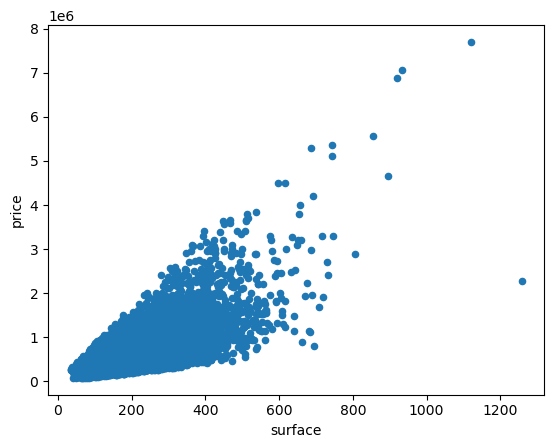

In [22]:
df.plot.scatter(x="surface",y="price") 

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

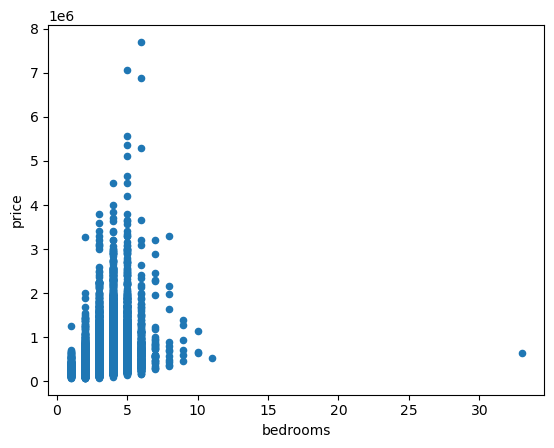

In [23]:
df.plot.scatter(x="bedrooms",y="price") 

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

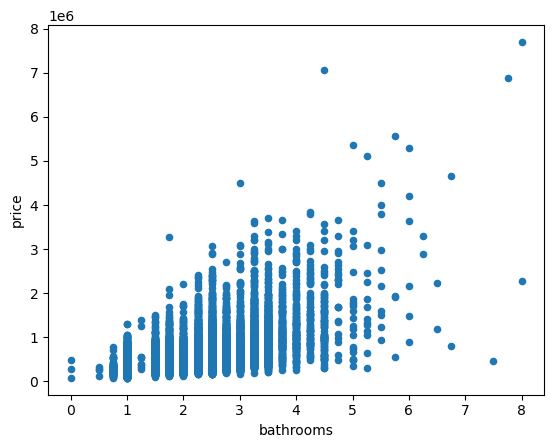

In [24]:
df.plot.scatter(x="bathrooms",y="price") 

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

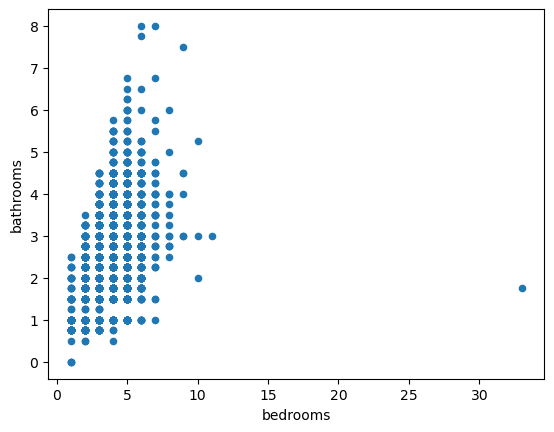

In [28]:
df.plot.scatter(x="bedrooms",y="bathrooms") 

In [31]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,surface
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,109.62554
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,238.76071
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,71.53531
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,182.08988
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,156.07704


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

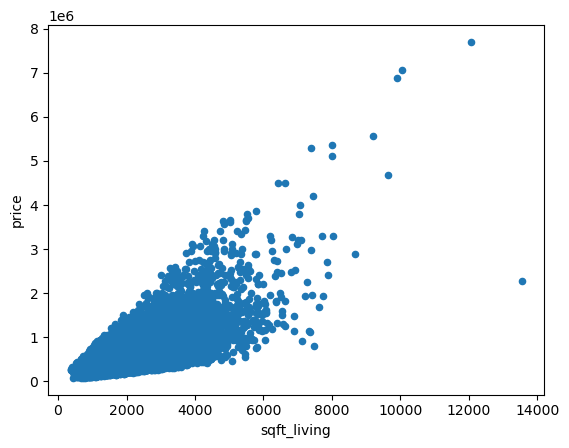

In [29]:
df.plot.scatter(x="sqft_living",y="price") 